<a href="https://colab.research.google.com/github/Kirtikaa25/redLight/blob/main/apiori1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas mlxtend openpyxl


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [7]:
# Step 1: Explore key distributions
print("📊 Driving Experience distribution:")
print(df['Driving Experience'].value_counts(bins=5).sort_index())

print("\n🎓 Education level distribution:")
print(df['Education level'].value_counts())

print("\n💰 Income distribution:")
print(df['Approximate monthly income of the person who violates traffic signals\n'].describe())

print("\n🎂 Age distribution:")
print(df['Age Group'].describe())


📊 Driving Experience distribution:
(0.493, 1.6]    188
(1.6, 2.7]        0
(2.7, 3.8]      309
(3.8, 4.9]        0
(4.9, 6.0]      303
Name: count, dtype: int64

🎓 Education level distribution:
Education level
Graduate            455
Higher_Secondary    180
Postgraduate         90
Below_Metric         75
Name: count, dtype: int64

💰 Income distribution:
count       800.000000
mean      36172.500000
std       29330.967011
min       18000.000000
25%       18000.000000
50%       18000.000000
75%       35000.000000
max      120000.000000
Name: Approximate monthly income of the person who violates traffic signals\n, dtype: float64

🎂 Age distribution:
count    800.000000
mean      30.246250
std        9.309683
min       17.000000
25%       24.000000
50%       24.000000
75%       39.500000
max       51.000000
Name: Age Group, dtype: float64


In [8]:
# Step 2: Binning

# Rename income column for convenience
df.rename(columns={'Approximate monthly income of the person who violates traffic signals\n': 'Income'}, inplace=True)

# Driving Experience Bins
df['Driving_Exp_Bin'] = pd.cut(df['Driving Experience'],
                               bins=[0, 2, 4, 100],
                               labels=["Driving_Exp_0_2", "Driving_Exp_3_4", "Driving_Exp_5plus"])

# Income Bins
df['Income_Bin'] = pd.cut(df['Income'],
                          bins=[0, 20000, 40000, 60000, 1000000],
                          labels=["Income_upto20k", "Income_21k_40k", "Income_41k_60k", "Income_60k_plus"])

# Age Bins
df['Age_Bin'] = pd.cut(df['Age Group'],
                       bins=[0, 19, 25, 35, 45, 100],
                       labels=["Age_Under20", "Age_20_25", "Age_26_35", "Age_36_45", "Age_46plus"])

# Show a few rows to confirm
df[['Driving Experience', 'Driving_Exp_Bin', 'Income', 'Income_Bin', 'Age Group', 'Age_Bin']].head(10)


,Driving Experience,Driving_Exp_Bin,Income,Income_Bin,Age Group,Age_Bin
0,6.0,Driving_Exp_5plus,35000,Income_21k_40k,24.0,Age_20_25
1,0.5,Driving_Exp_0_2,18000,Income_upto20k,24.0,Age_20_25
2,3.0,Driving_Exp_3_4,18000,Income_upto20k,24.0,Age_20_25
3,6.0,Driving_Exp_5plus,18000,Income_upto20k,24.0,Age_20_25
4,3.0,Driving_Exp_3_4,18000,Income_upto20k,24.0,Age_20_25
5,3.0,Driving_Exp_3_4,18000,Income_upto20k,24.0,Age_20_25
6,6.0,Driving_Exp_5plus,18000,Income_upto20k,24.0,Age_20_25
7,0.5,Driving_Exp_0_2,18000,Income_upto20k,24.0,Age_20_25
8,0.5,Driving_Exp_0_2,18000,Income_upto20k,24.0,Age_20_25
9,0.5,Driving_Exp_0_2,18000,Income_upto20k,24.0,Age_20_25


In [9]:
# Step 3: Create transaction-style data for Apriori

# Convert categorical fields into string-labels
df['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})

# Columns to be treated as items
columns_for_apriori = [
    'Gender',
    'Education level',
    'Occupation',
    'Driving_Exp_Bin',
    'Income_Bin',
    'Age_Bin'
]

# Turn each value into string labels like "Gender_Male"
for col in columns_for_apriori:
    df[col] = col + "_" + df[col].astype(str)

# Now create a new column that combines all selected items per row
df['Items'] = df[columns_for_apriori].values.tolist()

# Preview
df[['Items', 'Have you ever crossed the street during a red light?']].head(10)


,Items,Have you ever crossed the street during a red light?
0,"[Gender_Male, Education level_Postgraduate, Oc...",0
1,"[Gender_Male, Education level_Graduate, Occupa...",1
2,"[Gender_Male, Education level_Graduate, Occupa...",1
3,"[Gender_Male, Education level_Graduate, Occupa...",0
4,"[Gender_Male, Education level_Graduate, Occupa...",1
5,"[Gender_Female, Education level_Higher_Seconda...",0
6,"[Gender_Male, Education level_Below_Metric, Oc...",0
7,"[Gender_Male, Education level_Graduate, Occupa...",0
8,"[Gender_Female, Education level_Below_Metric, ...",0
9,"[Gender_Female, Education level_Graduate, Occu...",0


from matplotlib import pyplot as plt
_df_2['Have you ever crossed the street during a red light?'].plot(kind='hist', bins=20, title='Have you ever crossed the street during a red light?')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Have you ever crossed the street during a red light?'].plot(kind='line', figsize=(8, 4), title='Have you ever crossed the street during a red light?')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 4: Separate violators and non-violators
violators = df[df['Have you ever crossed the street during a red light?'] == 1]['Items'].tolist()
non_violators = df[df['Have you ever crossed the street during a red light?'] == 0]['Items'].tolist()

# Show how many records in each
len(violators), len(non_violators)


(196, 604)

In [11]:
# Step 5: Apriori on violators

# Encode the transaction list
te = TransactionEncoder()
te_ary = te.fit(violators).transform(violators)
violator_df = pd.DataFrame(te_ary, columns=te.columns_)

# Run Apriori with minimum support (change this to see more/less combinations)
frequent_itemsets_violators = apriori(violator_df, min_support=0.05, use_colnames=True)

# Sort by support
frequent_itemsets_violators = frequent_itemsets_violators.sort_values(by='support', ascending=False)

frequent_itemsets_violators.head(10)


,support,itemsets
11,0.903061,(Gender_Male)
16,0.642857,(Occupation_Employed)
87,0.607143,"(Gender_Male, Occupation_Employed)"
5,0.489796,(Driving_Exp_Bin_Driving_Exp_5plus)
62,0.474490,"(Driving_Exp_Bin_Driving_Exp_5plus, Gender_Male)"
0,0.459184,(Age_Bin_Age_20_25)
14,0.459184,(Income_Bin_Income_upto20k)
7,0.443878,(Education level_Graduate)
24,0.408163,"(Age_Bin_Age_20_25, Gender_Male)"
85,0.408163,"(Income_Bin_Income_upto20k, Gender_Male)"


from matplotlib import pyplot as plt
_df_0['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
# Generate association rules with a minimum lift threshold to ensure the rules are interesting
rules = association_rules(frequent_itemsets_violators, metric="lift", min_threshold=1.0)

# Sort the rules by lift to see the most interesting associations
rules_sorted = rules.sort_values(by="lift", ascending=False)

# Preview the top 10 rules
rules_sorted.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3022,"(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...","(Age_Bin_Age_46plus, Education level_Graduate)",0.107143,0.071429,0.051020,0.476190,6.666667,1.0,0.043367,1.772727,0.952000,0.400000,0.435897,0.595238
3047,"(Age_Bin_Age_46plus, Education level_Graduate)","(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...",0.071429,0.107143,0.051020,0.714286,6.666667,1.0,0.043367,3.125000,0.915385,0.400000,0.680000,0.595238
3029,"(Age_Bin_Age_46plus, Gender_Male, Education le...","(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...",0.071429,0.112245,0.051020,0.714286,6.363636,1.0,0.043003,3.107143,0.907692,0.384615,0.678161,0.584416
2627,"(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...","(Age_Bin_Age_46plus, Education level_Graduate)",0.112245,0.071429,0.051020,0.454545,6.363636,1.0,0.043003,1.702381,0.949425,0.384615,0.412587,0.584416
2630,"(Age_Bin_Age_46plus, Education level_Graduate)","(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...",0.071429,0.112245,0.051020,0.714286,6.363636,1.0,0.043003,3.107143,0.907692,0.384615,0.678161,0.584416
3040,"(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...","(Age_Bin_Age_46plus, Gender_Male, Education le...",0.112245,0.071429,0.051020,0.454545,6.363636,1.0,0.043003,1.702381,0.949425,0.384615,0.412587,0.584416
3036,"(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...","(Age_Bin_Age_46plus, Occupation_Employed, Educ...",0.153061,0.061224,0.051020,0.333333,5.444444,1.0,0.041649,1.408163,0.963855,0.312500,0.289855,0.583333
3033,"(Age_Bin_Age_46plus, Occupation_Employed, Educ...","(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...",0.061224,0.153061,0.051020,0.833333,5.444444,1.0,0.041649,5.081633,0.869565,0.312500,0.803213,0.583333
2313,"(Age_Bin_Age_46plus, Education level_Graduate)","(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...",0.071429,0.153061,0.056122,0.785714,5.133333,1.0,0.045190,3.952381,0.867133,0.333333,0.746988,0.576190
2308,"(Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...","(Age_Bin_Age_46plus, Education level_Graduate)",0.153061,0.071429,0.056122,0.366667,5.133333,1.0,0.045190,1.466165,0.950712,0.333333,0.317949,0.576190


Top 10 Rules Sorted by Lift, Confidence, and Conviction:
                                            antecedents  \
3022  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...   
3047     (Age_Bin_Age_46plus, Education level_Graduate)   
2630     (Age_Bin_Age_46plus, Education level_Graduate)   
3029  (Age_Bin_Age_46plus, Gender_Male, Education le...   
2627  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...   
3040  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...   
3033  (Age_Bin_Age_46plus, Occupation_Employed, Educ...   
3036  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...   
2313     (Age_Bin_Age_46plus, Education level_Graduate)   
2308  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...   

                                            consequents      lift  confidence  \
3022     (Age_Bin_Age_46plus, Education level_Graduate)  6.666667    0.476190   
3047  (Income_Bin_Income_60k_plus, Driving_Exp_Bin_D...  6.666667    0.714286   
2630  (Income_Bin_Income_60k_plus, Driving_Exp_Bin

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


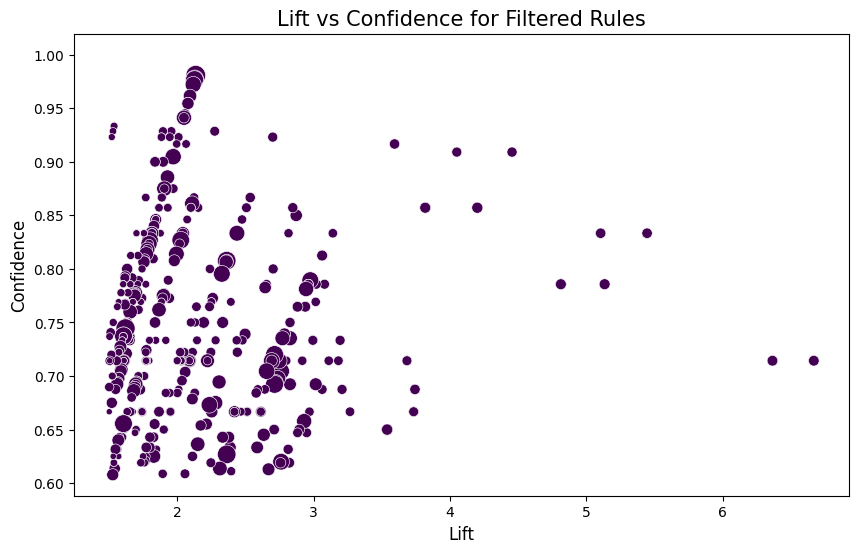

In [13]:
# Step 7: Interpreting the Association Rules
# Let's sort and filter the rules based on the key metrics (Lift, Confidence, Leverage, and Conviction).

# Sorting by Lift (descending), Confidence (descending), and Conviction (descending)
rules_sorted = rules.sort_values(by=['lift', 'confidence', 'conviction'], ascending=False)

# Displaying the top 10 rules
top_10_rules = rules_sorted.head(10)
print("Top 10 Rules Sorted by Lift, Confidence, and Conviction:")
print(top_10_rules[['antecedents', 'consequents', 'lift', 'confidence', 'leverage', 'conviction']])

# Filtering the rules to focus on those with Lift > 1.5 and Confidence > 60%
filtered_rules = rules_sorted[(rules_sorted['lift'] > 1.5) & (rules_sorted['confidence'] > 0.6)]

print("\nFiltered Rules with Lift > 1.5 and Confidence > 60%:")
print(filtered_rules[['antecedents', 'consequents', 'lift', 'confidence', 'leverage', 'conviction']])

# Step 8: Identifying Non-Influential Factors that Become Influential
# Based on the rules, let's identify the factors that are commonly appearing together and analyze if any non-influential factors
# (such as occupation, gender) become influential when combined with other factors.

# Inspecting how frequently combinations of factors appear in both antecedents and consequents
factor_combinations = pd.concat([filtered_rules['antecedents'], filtered_rules['consequents']])

# Flattening the list and counting combinations
factor_count = factor_combinations.explode().value_counts()
print("\nFactor Combinations and Their Counts:")
print(factor_count)

# Step 9: Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the distribution of Lift and Confidence for the filtered rules
plt.figure(figsize=(10, 6))

# Plotting Lift vs. Confidence
sns.scatterplot(data=filtered_rules, x='lift', y='confidence', hue='conviction', size='leverage',
                sizes=(20, 200), palette='viridis', legend=False)

plt.title('Lift vs Confidence for Filtered Rules', fontsize=15)
plt.xlabel('Lift', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.show()

# Step 10: Save and Export the Results for Further Analysis (Optional)
# If needed, you can export the results to a CSV for further inspection or use.
filtered_rules.to_csv("filtered_association_rules.csv", index=False)
